In [3]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
def generate_graph_randomly(t):
    """
    This function creates the graph, such that all the incoming nodes are linked randomly to the existing nodes
    :param t : input parameter representing the number of nodes.
    
    returns graph
    """
    # Create an dictionary
    graph = {i: set() for i in range(t)}
    
    for node in range(t):
        for neighbour in range(node+1,t):
            if(random.randint(0,1)):
                graph[node].add(neighbour)
                graph[neighbour].add(node)
            
    return graph 

In [5]:
def generate_graph_with_prob(t):
    """
    This function creates the graph such that the probability that the incoming node is linked to the degree
    of the exiting nodes.
    :param t : input parameter representing the number of nodes.
    
    returns graph

    """
    # Create an dictionary 
    graph = {i: set() for i in range(t)}
    
    # Assume '0' is the starting node
    # 1 gets linkes to node 0

    graph[1].add(1)
    graph[0].add(0)

    #Iterating through the next nodes
    for i in range(2,t):
        #calculate the degree of the nodes. The probablity of node will be linked to the existing node of high degree
        weight = [len(i) for i in graph.values()]
        node = int(random.choices(list(graph.keys()),weights= weight)[0])

        graph[node].add(i)
        graph[i].add(node)
            
    return graph 

In [6]:
random_graph = generate_graph_randomly(10000)
random_graph

In [7]:
prob_graph = generate_graph_with_prob(10000)
prob_graph


In [8]:
random_graph_degree = [len(i) for i in random_graph.values() ]
random_graph_degree

In [9]:
prob_graph_degree = [len(i) for i in prob_graph.values() ]
prob_graph_degree

[]

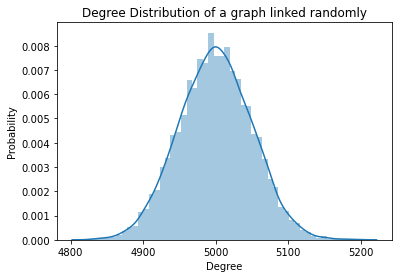

In [45]:

plt = sns.distplot(random_graph_degree)
plt.set(xlabel='Degree', ylabel='Probability',title = "Degree Distribution of a graph linked randomly")
plt.plot()

Here the x-axis scale is from (4800,5200) because all of the nodes have degrees in this range 

Y-axis specifies the probability of nodes haveing the corresponding degree 

[]

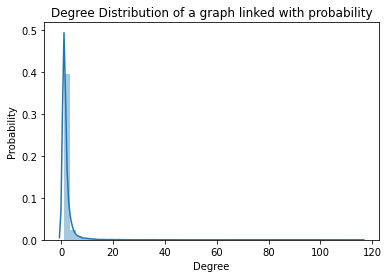

In [46]:
plt = sns.distplot(prob_graph_degree)
plt.set(xlabel='Degree', ylabel='Probability',title = "Degree Distribution of a graph linked with probability")
plt.plot()

Here the x-axis scale is from (0,120) because all of the nodes have degrees in this range 

Y-axis specifies the probability of nodes haveing the corresponding degree 

# ENTROPY

In [10]:
def entropy(prob_dist):

    return -np.sum(np.multiply(prob_dist, np.log2(prob_dist)))

In [11]:
random_graph_freq = dict(Counter(random_graph_degree))
random_graph_degree_prob = [i/10000 for i in random_graph_freq.values()]
random_graph_degree_prob

In [12]:
entropy(random_graph_degree_prob)

7.6318656948612915

In [13]:
prob_graph_freq = dict(Counter(prob_graph_degree))

prob_graph_degree_prob = [i/10000 for i in prob_graph_freq.values()]
prob_graph_degree_prob

In [14]:
entropy(prob_graph_degree_prob)

1.7369321396761648